In [1]:
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
length_scale_samples= np.load('length_scale_samples.npy')
feature_names= np.load(r'..\data\sklearn_toy_diabetes_feature_names.npy')

<IPython.core.display.Javascript object>


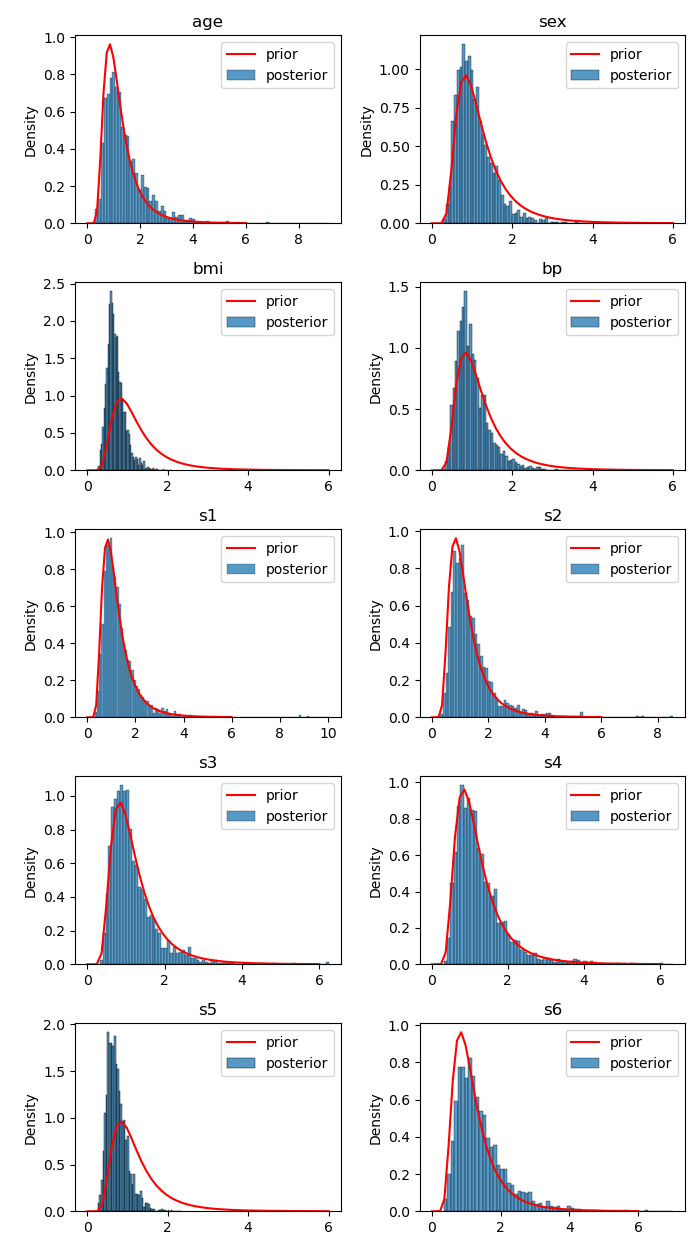

In [3]:
plt.close('all')
fig, ax= plt.subplots(5,2, figsize=(3.5*2, 2.5*5))
for i, feat_name in enumerate(feature_names):
    axrow= int(i/2)
    axcol= i % 2
    sns.histplot(data= length_scale_samples[:,i], stat='density', ax=ax[axrow, axcol], label='posterior')
    ax[axrow, axcol].set_title(feat_name)
    x1= np.linspace(0, 6, 50)
    ax[axrow, axcol].plot(x1, st.invgamma.pdf(x1, a= 5.0, scale= 5.0), 'r', label='prior')
    ax[axrow, axcol].legend()
plt.tight_layout()

In [4]:
import pandas as pd
from sklearn import metrics as met

In [5]:
df= pd.read_csv('yhat_tfp.csv')
df_train= df.loc[df['traintest'] == 'train']
df_test= df.loc[df['traintest'] == 'test']

In [6]:
print('\nTrain set:')
print('\tRMSE: ',np.sqrt(met.mean_squared_error(df_train['target'], df_train['yhat_mean']) ) )
print('\nTest set:')
print('\tRMSE: ',np.sqrt(met.mean_squared_error(df_test['target'], df_test['yhat_mean']) ) )


Train set:
	RMSE:  54.74261061066464

Test set:
	RMSE:  50.91890995546034
